<a href="https://colab.research.google.com/github/jbornilla/co2emissions/blob/main/Julia_Bornilla_MATH_2315_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

Use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). 



In this lab, we want to find the top 10 countries that led in having the highest CO2 emissions in 2020, and analyze their behaviors dating back 50 years ago. To do so, we will utilize the data set owid-co2-data.csv compiled by Our World in Data.


## Import and set up the data set

The data set that will be used in this lab is called owid-co2-data.csv and belongs to Our World in Data. Their github page provides the necessary links to the files, and downloading the CSV file provides the necessary information needed for this lab.

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

Solution:

The code below transforms the downloaded CSV data file into a Data Frame which allows for easier analysis of the rows and columns of information. The Data Frame is then renamed as df to allow for shorter code to be written out. Once those first two lines of code are finished, the last line displays the head of the Data Frame, or the first 5 rows in the data set and their corresponding columns. 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
type(df)
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


Because the first two lines of code do not produce any outputs, we can see that only the head of the Data Frame is displayed. Here, we can see the first five rows of data, along with their 74 columns. Some columns have numerical data while others read NaN. This means that the information in these columns are not numbers and are possibly strings of letters or characters.The purpose behind displaying part of the Data Frame was to get a feel for what the data holds and to also see what kind of columns will need to be looked at in order to find the top 10 CO2 emitters of 2020. 

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

Solution:

The first line of code serves to distinguish which entries in the Country column are groups of countries. These titles in the data will then be classified as non_countries where they will then be removed with that second line of code. This will then provide us with a new list dislayed by the third line of code. 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [5]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']


Remove the rows corresponding to the non-countries.

In [4]:
df = df.loc[df['country'].isin(non_countries) == False]

In [6]:
df['country']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
46518       Zimbabwe
46519       Zimbabwe
46520       Zimbabwe
46521       Zimbabwe
46522       Zimbabwe
Name: country, Length: 39638, dtype: object

Because the goal of this lab is to find the top 10 countries that contribute most to CO2 emissions, we want to ensure that we are only looking at singular countries. These lines of code ensure exactly this, so that the Data Frame now only holds the data necessary for our anaylsis purposes.

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

Like what was done previously, this line of code displays the head of the Data Frame, which are the first five rows of data from the set. 

##### Solution:


In [7]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


Allowing for this visualization of even just the first couple of rows of data and their columns allows us to get a grasp of what kind of information the Data Frame holds. It will also allow us to see what columns will be necessary in our analysis.

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

##### Solution:

The first line of code is meant to return the columns in the Data Frame that are detected to have any missing values, and display the amount found in each one. The second half of the code is meant to give a broader range of information as it prints the amount of entries a column has and its classified type. 

In [8]:
df.isna().sum()

country                         0
year                            0
iso_code                      387
population                   3585
gdp                         25103
                            ...  
share_global_other_co2      38018
total_ghg                   33819
total_ghg_excluding_lucf    33819
trade_co2                   35908
trade_co2_share             35909
Length: 74, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

Similar to displaying the head of the Data Frame, looking at the basic logistics of the data allows us to do a check of what kind of information we are dealing with, what we will need, and how to go about its analysis.
1. Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
No, I think all the columns have the correct data type. Seeing as many of the columns will be numerical values such as years or totals, it makes sense that they are classified as floats as many of them probably have decimals as well. 
2. Do any of the columns have missing (null) values?
Yes, there are columns that do having missing values. Any columns that display a count less than the Country or Year column will have null values.

##### $\rightarrow$ What years are present in the data set?

This format of code seen below allows one to print any column present in the Data Frame. Here, it displays the range of the years present through showing the first and last five rows of the data.

##### Solution

In [10]:
df['year']

0        1850
1        1851
2        1852
3        1853
4        1854
         ... 
46518    2017
46519    2018
46520    2019
46521    2020
46522    2021
Name: year, Length: 39638, dtype: int64

Because the data is already in numerical order, it was extemely helpful to print the years that are compiled in the data. Running the code above gave use the first and last five rows meaning that it shows the earliest and latest year. This means that the years 1850-2021 are present in the data set. 

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



##### Solution

The first line of code below was meant to create a new variable that only had the necessary parts of the Data Frame that we need. Df_emissions is now its own Data Frame with only the country names, years, and the CO2 outputs. The second line was just to ensure that the new Data Frame looks correct. The last line of code then uses df_emissions and the .sort_values function along with the ascending command to put the data in order from most recent year to oldest, and the highest CO2 values to least.

In [28]:
df_emissions = df[['country','year','co2']]
df_emissions.head()

,country,year,co2
0,Afghanistan,1850,NaN
1,Afghanistan,1851,NaN
2,Afghanistan,1852,NaN
3,Afghanistan,1853,NaN
4,Afghanistan,1854,NaN


In [27]:
df_emissions.sort_values(by=['year','co2',], ascending=False)

,country,year,co2
8990,China,2021,11472.368
44222,United States,2021,5007.336
20137,India,2021,2709.684
35054,Russia,2021,1755.547
21757,Japan,2021,1067.398
...,...,...,...
32909,Papua New Guinea,1750,0.000
34435,Reunion,1750,0.000
37069,Sierra Leone,1750,0.000
37341,Singapore,1750,0.000


The code above served to sort the data that we want to analyze in order from greatest to least. The years had been put from most recent year to oldest, and within each of those years, their CO2 value were then ordered from highest value to lowest. Expanding this list and scrolling to where the 2020 values start allowed us to find the top 10 countries.


The top 10 countries that had the most CO2 emissions, starting with the largest contributor, are China, the United States, India, Russia, Japan, Iran, Saudi Arabia, Germany, Indonesia and South Korea.

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

The code here plots a histogram of the CO2 levels in the year 2020. Much of the code is to set what the histogram will look like such as size, coloring, and the type of scale it uses, which in this case is a density scale. 

Solution

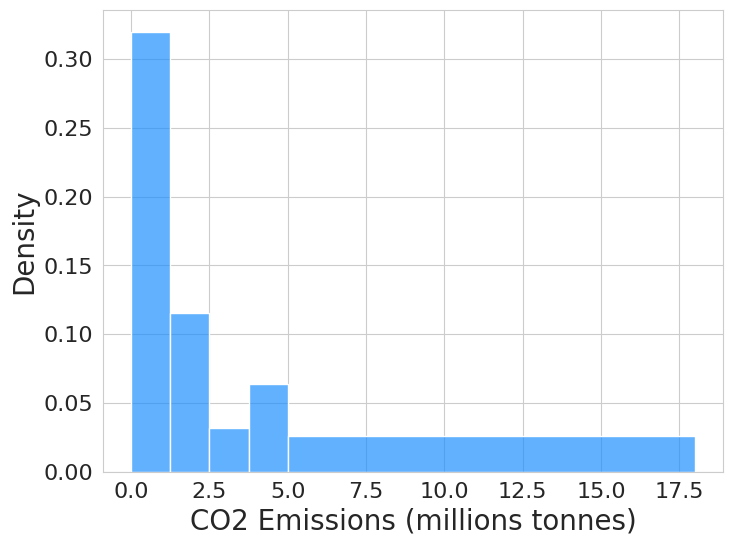

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(data=df[df['year']==2020], x='co2', bins=np.r_[np.linspace(0,5,5),18], color='dodgerblue', alpha = 0.7, stat='density')
plt.ylabel('Density', fontsize=20)
plt.xlabel('CO2 Emissions (millions tonnes)', fontsize=20)
plt.tick_params(labelsize=16);

The diagram above displays the trends of the 2020 CO2 emissions through a hisotrgram with a density scale. The values above are in millions tonnes.

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

##### Solution

The code seen here is similar to the code above for the histogram except now, it plots a boxplot. This will display the CO2 emissions of the year 2020, but now it is in a different format. 

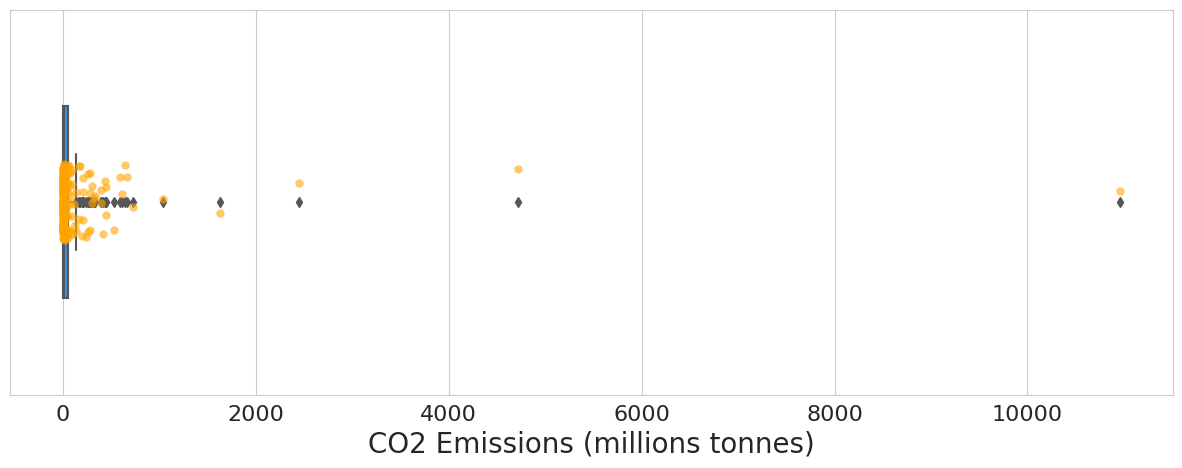

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df[df['year']==2020], x='co2', color='dodgerblue', width=0.5)
sns.stripplot(data=df[df['year']==2020], x='co2', color='orange', size=6, alpha=0.6)
plt.xlabel('CO2 Emissions (millions tonnes)', fontsize=20)
plt.tick_params(labelsize=16);

It can be seen in the boxplot above that the much of the data is concentrated around 0. Hoever, due to the large scale and amount of values needed to be plotted, this just means that the minimum, maximum and interquartile range are of lesser values and the outliers are of much greater value.

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

Yes, the CO2 emission values of the top 10 emitters are outliers in the distribution. Because this boxplot covers all of the year 2020, there is a large amount of numbers to be plotted, therefore there will als be a larger number of outliers present.

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

##### Solution

Yes, there doesn't seem to be much data present for the top 10 emitters during the years 1971 to 2020. Many of the countries are smaller and relatively lesser known, in comparison to the top 10 like China, the United States, India, Russia, Japan, Iran, Saudi Arabia, Germany, Indonesia and South Korea.

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

Solution

This code graphs a time plot displaying the CO2 emissions behavior of the top 10 countries. Each top country was listed out  to ensure that it would individually plot trendlines of their emissions. These trends were analyzed based on the amount of CO2 emissions per year.

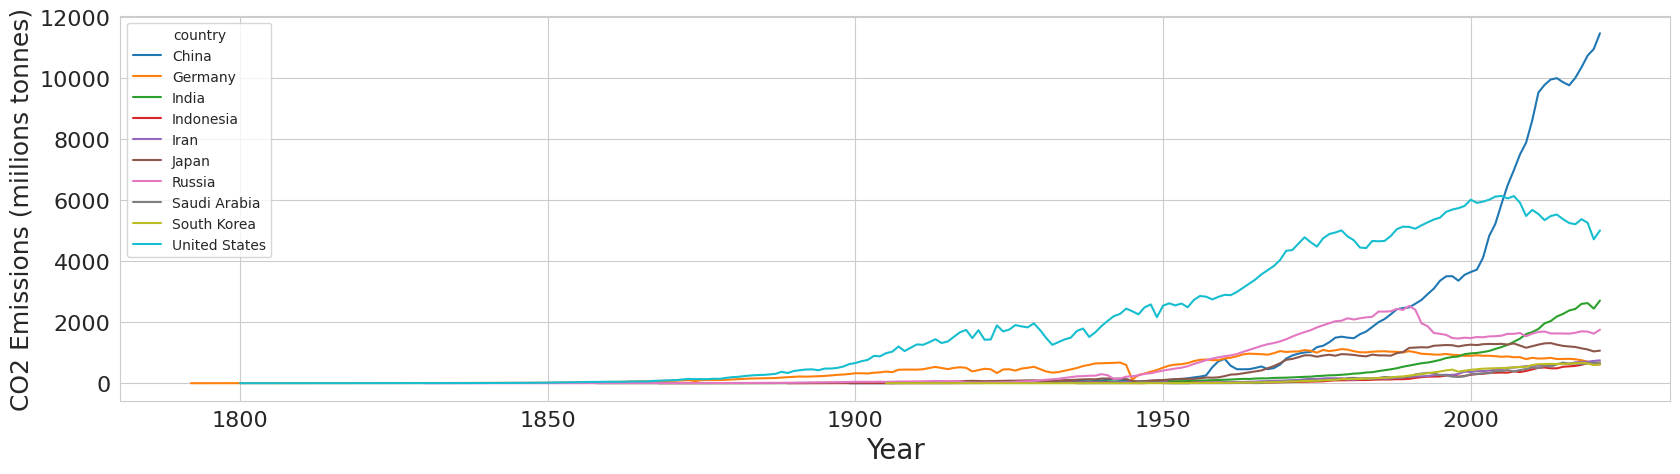

In [46]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x='year', y='co2', hue='country')
plt.xlabel('Year', fontsize=20)
plt.ylabel('CO2 Emissions (miilions tonnes)', fontsize=18)
plt.tick_params(labelsize=16);

The plot shows how the United States was at the forefront of the CO2 emissions since 1971 and even years past. However, once it hit the 2000s, the United States' trend appears to grow by less and less, almost hitting a decrease, while China's trend skyrockets. This alone makes them the very top CO2 emitter in 2020.

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

Solution

The code is the same as above, but now there is another lineplot added onto the graph. This shows the behavior of the average total CO2 emissions over all countries throughout the years.

<ipython-input-54-59a2f423b522>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data= df_emissions.groupby('year').mean(), x='year', y='co2', color='k')


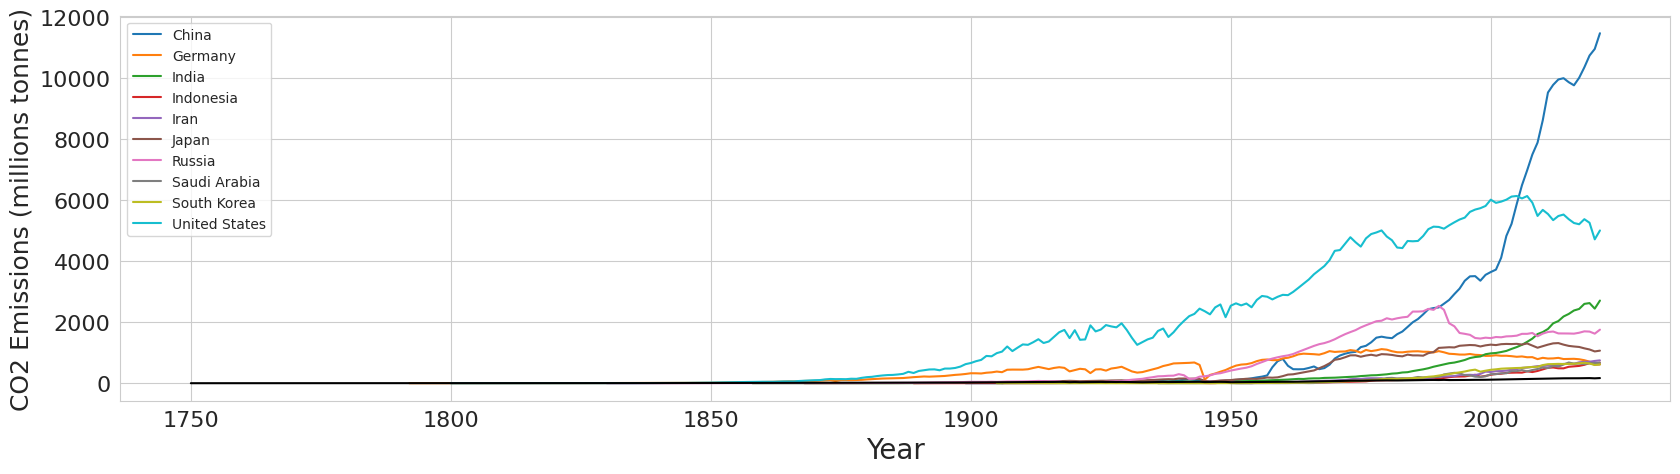

In [54]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x='year', y='co2', hue='country')
sns.lineplot(data= df_emissions.groupby('year').mean(), x='year', y='co2', color='k')
plt.xlabel('Year', fontsize=20)
plt.ylabel('CO2 Emissions (millions tonnes)', fontsize=18)
plt.tick_params(labelsize=16);

As we can see in the graph, all the trends seem to be the same as the previous timeplot, but now there is a trendline for the average values throughout the years. This is represented by the blackline which is relatively low to the x-axis. This is telling us that the average is not that high as a whole, but it still increases as the years go by. 

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

##### Solution

The code here is again the same as before with the other lineplots, but now the data and their trends are represented on a logarithmic scale, done by plt.yscale('log').

<ipython-input-56-7dcce756b50b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data= df_emissions.groupby('year').mean(), x='year', y='co2', color='k')


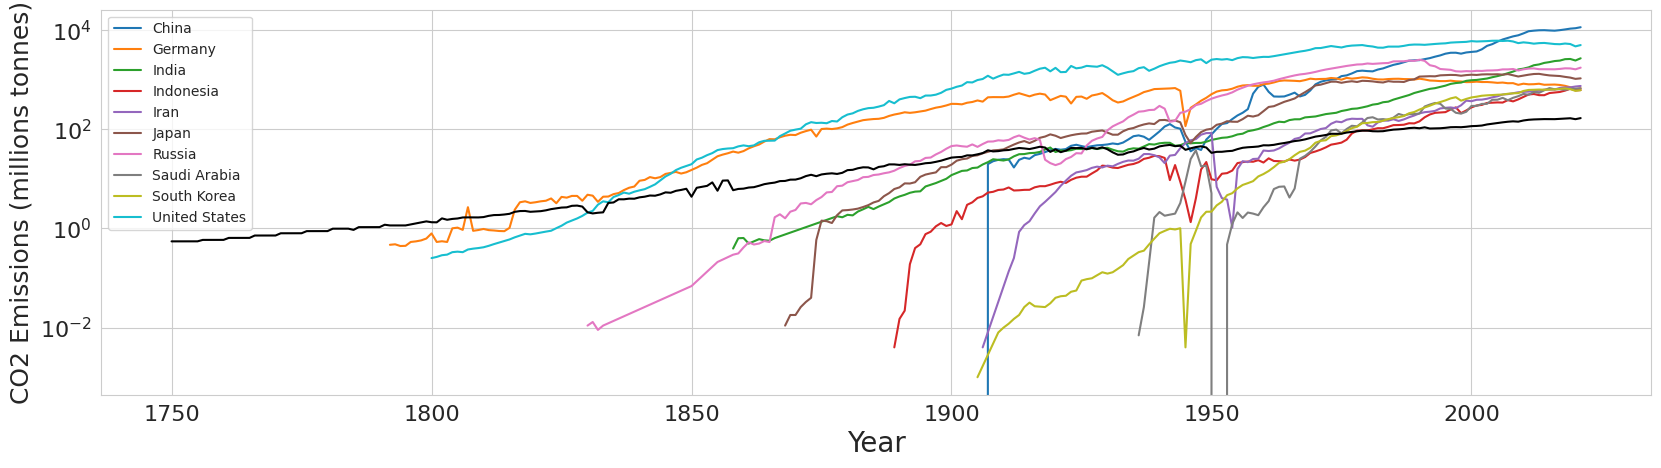

In [56]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x='year', y='co2', hue='country')
sns.lineplot(data= df_emissions.groupby('year').mean(), x='year', y='co2', color='k')
plt.xlabel('Year', fontsize=20)
plt.ylabel('CO2 Emissions (millions tonnes)', fontsize=18)
plt.yscale('log')
plt.tick_params(labelsize=16);

In comparison to the previous graphs, the one above seems slightly erratic in its behavior. However, this is because the log scale will take into account really small values as well and show how far these have grown over the years. 

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

Over the last 50 years, these countries have only continued to grow and increase their carbon emissions. Like mentioned earlier, the United States at one point, had been leading, but as the 2000s came, China's emissions only started to increase from there and hold the title of the top emitter. One thing to note however, is that other countires out of the top 10 seem to increase as well,  but in a much steadier and slower rate. Again, it is the the US and China that have seemed to dramatically reach higher levels.